# All S1 cells information

In [1]:
import h5py
import json
import numpy as np
import os
import sys
from matplotlib import pyplot as plt

# rootFolder = '/home/fernando/S1_netpyne'
#------------------------------------------------------------------------------  

In [2]:
rootFolder = os.getcwd()
rootFolder = rootFolder[:-5]
rootFolder

'/home/fernando/S1_netpyne'

## Cell Number distribution

In [3]:
#------------------------------------------------------------------------------
# Cells
#------------------------------------------------------------------------------
# Load 55 Morphological Names-> L1:6 L23:10 L4:12 L5:13 L6:14
# Load 207 Morpho-electrical Names-> L1:14 L23:43 L4:46 L5:52 L6:52

with open(rootFolder + '/info/anatomy/S1-cells-distributions-Rat.txt') as metype_file:
    metype_content = metype_file.read()       

MtypeNumber = {}
MEtypeNumber = {}
MtypePop = []
MEtypePop = []
popLabel = {}
N = 0
for line in metype_content.split('\n')[:-1]:
    metype, mtype, etype, n, m = line.split()
    MEtypeNumber[metype] = int(n)
    popLabel[metype] = mtype
    MtypeNumber[mtype] = int(m)

    if mtype not in MtypePop:
        MtypePop.append(mtype)
    MEtypePop.append(metype)
    
    N = N + int(n)
    
print ('Number of cells = %d' % N)

Number of cells = 31346


In [4]:
Epops = ['L23_PC', 'L4_PC', 'L4_SS', 'L4_SP', 
             'L5_TTPC1', 'L5_TTPC2', 'L5_STPC', 'L5_UTPC',
             'L6_TPC_L1', 'L6_TPC_L4', 'L6_BPC', 'L6_IPC', 'L6_UTPC']
Ipops = []
for popName in MtypePop:
    if popName not in Epops:
        Ipops.append(popName)

In [5]:
## https://bbp.epfl.ch/nmc-portal/assets/documents/static/Download/hoc_combos_syn.1_0_10.allzips.tar
## extracted 1035 folders in home/fernando/S1_BBP/cell_data/  #~ not inclued in the github

StochKvcells = []
nonStochKvcells = []

for cellName in MEtypePop:
    number = 1 # same for all metype cells
    os.chdir('/home/fernando/S1_BBP/cell_data/'+cellName+'_'+str(number)+'/')
    
    foldermech = os.listdir('mechanisms/')
    if 'StochKv.mod' in foldermech:
        StochKvcells.append(cellName) 
        if 100*MEtypeNumber[cellName]/MtypeNumber[popLabel[cellName]] > 25:
            print('%s %s %.0f%s %d %d' % (cellName, '1', 100*MEtypeNumber[cellName]/MtypeNumber[popLabel[cellName]],'%', MEtypeNumber[cellName], MtypeNumber[popLabel[cellName]]))
        else:
            print('%s %s %.0f%s %d %d' % (cellName, '2', 100*MEtypeNumber[cellName]/MtypeNumber[popLabel[cellName]],'%', MEtypeNumber[cellName], MtypeNumber[popLabel[cellName]]))
    else:
        nonStochKvcells.append(cellName)
#         print('%s %s %.0f%s %d %d' % (cellName, '0', 100*MEtypeNumber[cellName]/MtypeNumber[popLabel[cellName]],'%', MEtypeNumber[cellName], MtypeNumber[popLabel[cellName]]))


L1_HAC_cIR216 2 11% 10 91
L1_NGC-DA_cSTUT189 2 11% 8 72
L23_BP_bIR215 2 14% 4 28
L23_BP_dSTUT214 2 11% 3 28
L23_BTC_bIR215 2 7% 7 104
L23_DBC_bIR215 2 18% 32 175
L23_LBC_cSTUT189 2 5% 22 456
L23_NBC_cIR216 2 2% 6 268
L23_NGC_cSTUT189 2 9% 5 56
L4_BP_bIR215 2 12% 1 8
L4_BP_dSTUT214 2 12% 1 8
L4_BTC_bIR215 2 10% 2 20
L4_BTC_bSTUT213 2 10% 2 20
L4_DBC_bIR215 1 32% 13 40
L4_DBC_bSTUT213 2 10% 4 40
L4_DBC_cIR216 2 18% 7 40
L4_LBC_cSTUT189 1 25% 31 122
L4_LBC_dSTUT214 2 7% 9 122
L4_NBC_cIR216 2 5% 5 96
L4_NGC_cSTUT189 2 17% 1 6
L5_BP_bIR215 2 15% 5 34
L5_BP_dSTUT214 2 9% 3 34
L5_DBC_bIR215 1 35% 34 96
L5_DBC_bSTUT213 2 9% 9 96
L5_DBC_cIR216 2 18% 17 96
L5_LBC_cIR216 2 6% 13 210
L5_LBC_cSTUT189 2 18% 37 210
L5_LBC_dSTUT214 2 23% 49 210
L5_MC_bIR215 2 11% 44 395
L5_MC_bSTUT213 2 4% 16 395
L5_MC_cSTUT189 2 4% 16 395
L5_NBC_bIR215 2 7% 14 201
L5_NBC_bSTUT213 2 13% 27 201
L5_NBC_cIR216 2 7% 14 201
L5_NBC_cSTUT189 2 20% 40 201
L5_NBC_dSTUT214 2 6% 13 201
L5_NGC_cSTUT189 2 12% 1 8
L6_BP_bIR215 2 14

## StochKv channels

In [6]:
StochKvcellsNumber = 0
for metype in StochKvcells:    
    StochKvcellsNumber = StochKvcellsNumber + MEtypeNumber[metype]

print('cells with StochKv channel = %d (%.2f percent) ' % (StochKvcellsNumber,100.0*StochKvcellsNumber/N))     

cells with StochKv channel = 1137 (3.63 percent) 


## Load efel analysis

In [7]:
feature_items = ['mean_frequency', 'ISI_CV', 'time_to_first_spike', 'time_to_second_spike', 'AP_height', 'AP_width', 'AP_amplitude','voltage_base']

ampstim =  [0.1 ,0.2, 0.4, 0.8]
durationstim = 2000
delaystim = 700
timesimulation = 3000

feature_efel = {}
for cell in MEtypePop:
    for number in range(1,6):
        cellName = cell+'_'+str(number)
        with open(rootFolder + '/info/scripts_comparations/Figures-comparation/0.1_0.2_0.4_0.8_nA/info_efel_4steps_BBP_NetPyNE_' + cellName + '.json', 'r') as f:
            feature_efel[cellName] = json.load(f) 

In [50]:
feature_BBP = []
feature_NetPyNE = []
feature_BBP_Stoch = []
feature_NetPyNE_Stoch = []
feature_BBP_all = []
feature_NetPyNE_all = []

for cell in MEtypePop:
    for number in range(1,6):
        cellName = cell+'_'+str(number)
        feature_name = 'mean_frequency'
        step_number = 0
        if feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])]==0:
            step_number += 1
            if feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])]==0:
                step_number += 1
                if feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])]==0:
                    step_number += 1
                    if feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])]==0:
                        step_number += 1
        
        if step_number < 4:
#             print(cellName, feature_name, ampstim[step_number],'BBP', feature_efel[cellName]['BBP'][cellName][feature_name][str(ampstim[step_number])])
#             print(cellName, feature_name, ampstim[step_number], 'NetPyNE', feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])])
            if cell in StochKvcells:
                feature_BBP_Stoch.append(feature_efel[cellName]['BBP'][cellName][feature_name][str(ampstim[step_number])])
                feature_NetPyNE_Stoch.append(feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])])
            else:
                feature_BBP.append(feature_efel[cellName]['BBP'][cellName][feature_name][str(ampstim[step_number])])
                feature_NetPyNE.append(feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])])

            feature_BBP_all.append(feature_efel[cellName]['BBP'][cellName][feature_name][str(ampstim[step_number])])
            feature_NetPyNE_all.append(feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])])


In [51]:
print(np.size(feature_BBP),np.size(feature_NetPyNE))
print(np.size(feature_BBP_Stoch),np.size(feature_NetPyNE_Stoch))

765 765
270 270


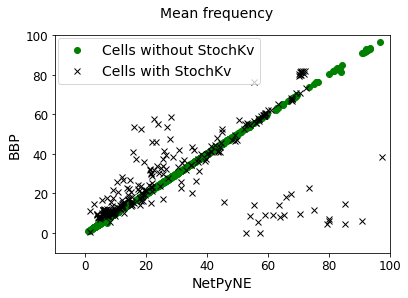

In [48]:
# plot
fontsiz=14
figSize = (6,4)
fig = plt.figure(figsize=figSize)  # Open a new figure
fig.suptitle('Mean frequency', fontsize=14)
plt.subplot(1, 1, 1)
plt.ylabel('BBP', fontsize=fontsiz)
plt.plot(feature_NetPyNE, feature_BBP, 'go', label='Cells without StochKv') 
plt.plot(feature_NetPyNE_Stoch, feature_BBP_Stoch, 'kx', label='Cells with StochKv') 
plt.xlabel('NetPyNE', fontsize=fontsiz)
plt.xlim(-10, 100)
plt.ylim(-10, 100)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(False)
plt.legend(loc='upper right', bbox_to_anchor=(0.635, 1.02), fontsize=14)
# plt.ion()
plt.savefig(rootFolder + '/info/scripts_comparations/Figures-comparation/0.1_0.2_0.4_0.8_nA/comparation_%s.png' % feature_name, facecolor = 'white' , dpi=300)
                    

## New

In [53]:
print(np.size(feature_BBP_all),np.size(feature_NetPyNE_all))

1035 1035


In [116]:
popRates_BBP = {}
popRates_NetPyNE = {}
for pop in MtypePop:
    popRates_BBP[pop] = []
    popRates_NetPyNE[pop] = []

for cell in MEtypePop:
    for number in range(1,6):
        cellName = cell+'_'+str(number)
        feature_name = 'mean_frequency'
        step_number = 0
        if feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])]==0:
            step_number += 1
            if feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])]==0:
                step_number += 1
                if feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])]==0:
                    step_number += 1
                    if feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])]==0:
                        step_number += 1
                        
#         print(popLabel[cell])
        pop = popLabel[cell]
        popRates_BBP[pop].append(feature_efel[cellName]['BBP'][cellName][feature_name][str(ampstim[step_number])])
        popRates_NetPyNE[pop].append(feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])])

#         print('%.2f %.2f' % (feature_efel[cellName]['BBP'][cellName][feature_name][str(ampstim[step_number])],feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])]))

# for cell in MEtypePop:
#     print('%.2f %.2f  %.2f %.2f' % (np.mean(popRates_BBP[cell]),np.std(popRates_BBP[cell]),np.mean(popRates_NetPyNE[cell]),np.std(popRates_NetPyNE[cell])))

In [122]:
x = np.arange(1, 56)
y = []
e = []
y2 = []
e2 = []
for pop in MtypePop:    
    y.append(np.mean(popRates_BBP[pop]))
    e.append(np.std(popRates_BBP[pop]))
    y2.append(np.mean(popRates_NetPyNE[pop]))
    e2.append(np.std(popRates_NetPyNE[pop]))

In [ ]:
plt.figure(figsize=(2,12))
plt.errorbar(y, x, xerr=e, linestyle='None', marker='o')
# plt.ylim(12.5,-0.5)
plt.ylim(0,56)
plt.yticks(x, MtypePop, fontsize=10);

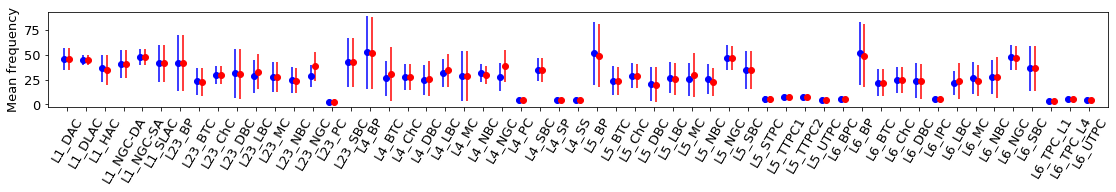

In [169]:
plt.figure(figsize=(19,1.75))
plt.errorbar(x-0.125, y, e, linestyle='None', marker='o', color='blue')
plt.errorbar(x+0.125, y2, e2, linestyle='None', marker='o', color='red')
# plt.ylim(12.5,-0.5)
plt.ylabel('Mean frequency', fontsize=13)
plt.xlim(0,56)
plt.xticks(x, MtypePop, fontsize=13, rotation=60);
plt.yticks(fontsize=13);
plt.savefig(rootFolder + '/info/scripts_comparations/Figures-comparation/0.1_0.2_0.4_0.8_nA/comparation_%s_populations.png' % feature_name, facecolor = 'white' , dpi=300)
     

In [ ]:
plt.figure(figsize=(12,3))
widths = 0.6
plt.subplot(1, 1, 1) 
number = 0

popRates = []
popNames = []

for cell in MEtypePop:
    for number in range(1,6):
        cellName = cell+'_'+str(number)
        popName
        step_number = 0
        
            step_number += 1

        popRates.append()
        popNames.append()
        
        plt.text(4.85, number2 + 0.13, 'N=' + str(popNumber[popName]), fontsize=14)

    ind = np.arange(len(popNames))
    plt.barh(ind+0.1-0.1*number,popRates, widths, label=paramsName[5:]) 
    number = number + 1

plt.ylim(12.5,-0.5)
plt.xlim(0,5.9)
plt.xlabel('F (Hz)', fontsize=18)
plt.yticks(ind, popNames, fontsize=10)
plt.legend(loc='upper right', bbox_to_anchor=(0.8, 1.0))

In [11]:
feature_BBP = []
feature_NetPyNE = []
feature_BBP_Stoch = []
feature_NetPyNE_Stoch = []

for cell in MEtypePop:
    for number in range(1,6):
        cellName = cell+'_'+str(number)
        feature_name = 'voltage_base'
        step_number = 0
        if feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])]==0:
            step_number += 1
            if feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])]==0:
                step_number += 1
                if feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])]==0:
                    step_number += 1
                    if feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])]==0:
                        step_number += 1
        
        if step_number < 4:
#             print(cellName, feature_name, ampstim[step_number],'BBP', feature_efel[cellName]['BBP'][cellName][feature_name][str(ampstim[step_number])])
#             print(cellName, feature_name, ampstim[step_number], 'NetPyNE', feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])])
            if cell in StochKvcells:
                feature_BBP_Stoch.append(feature_efel[cellName]['BBP'][cellName][feature_name][str(ampstim[step_number])])
                feature_NetPyNE_Stoch.append(feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])])
            else:
                feature_BBP.append(feature_efel[cellName]['BBP'][cellName][feature_name][str(ampstim[step_number])])
                feature_NetPyNE.append(feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])])


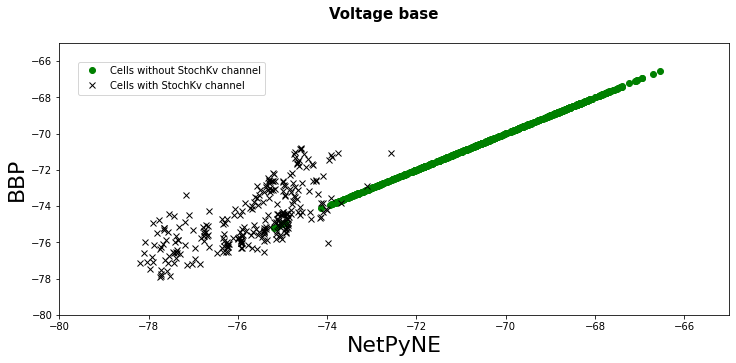

In [12]:
# plot
fontsiz=22
figSize = (12,5)
fig = plt.figure(figsize=figSize)  # Open a new figure
fig.suptitle('Voltage base', fontsize=15, fontweight='bold')
plt.subplot(1, 1, 1)
plt.ylabel('BBP', fontsize=fontsiz)
plt.plot(feature_NetPyNE, feature_BBP, 'go', label='Cells without StochKv channel') 
plt.plot(feature_NetPyNE_Stoch, feature_BBP_Stoch, 'kx', label='Cells with StochKv channel') 
plt.xlabel('NetPyNE', fontsize=fontsiz)
plt.xlim(-80, -65)
plt.ylim(-80, -65)
plt.grid(False)
plt.legend(loc='upper right', bbox_to_anchor=(0.315, 0.95))
# plt.ion()
plt.savefig(rootFolder + '/info/scripts_comparations/Figures-comparation/0.1_0.2_0.4_0.8_nA/comparation_%s.png' % feature_name, facecolor = 'white' , dpi=300)
                    

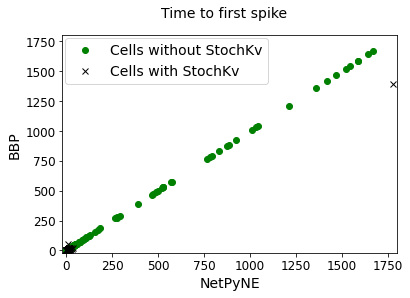

In [40]:
feature_BBP = []
feature_NetPyNE = []
feature_BBP_Stoch = []
feature_NetPyNE_Stoch = []

for cell in MEtypePop:
    for number in range(1,6):
        cellName = cell+'_'+str(number)
        feature_name = 'time_to_first_spike'
        step_number = 0
        if feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])]==0:
            step_number += 1
            if feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])]==0:
                step_number += 1
                if feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])]==0:
                    step_number += 1
                    if feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])]==0:
                        step_number += 1
        
        if step_number < 4:
#             print(cellName, feature_name, ampstim[step_number],'BBP', feature_efel[cellName]['BBP'][cellName][feature_name][str(ampstim[step_number])])
#             print(cellName, feature_name, ampstim[step_number], 'NetPyNE', feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])])
            if cell in StochKvcells:
                feature_BBP_Stoch.append(feature_efel[cellName]['BBP'][cellName][feature_name][str(ampstim[step_number])])
                feature_NetPyNE_Stoch.append(feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])])
            else:
                feature_BBP.append(feature_efel[cellName]['BBP'][cellName][feature_name][str(ampstim[step_number])])
                feature_NetPyNE.append(feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])])
# plot
fontsiz=14
figSize = (6,4)
fig = plt.figure(figsize=figSize)  # Open a new figure
fig.suptitle('Time to first spike', fontsize=14)
plt.subplot(1, 1, 1)
plt.ylabel('BBP', fontsize=fontsiz)
plt.plot(feature_NetPyNE, feature_BBP, 'go', label='Cells without StochKv') 
plt.plot(feature_NetPyNE_Stoch, feature_BBP_Stoch, 'kx', label='Cells with StochKv') 
plt.xlabel('NetPyNE', fontsize=fontsiz)
plt.xlim(-20, 1800)
plt.ylim(-20, 1800)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(False)
plt.legend(loc='upper right', bbox_to_anchor=(0.635, 1.02), fontsize=14)
# plt.ion()
plt.savefig(rootFolder + '/info/scripts_comparations/Figures-comparation/0.1_0.2_0.4_0.8_nA/comparation_%s.png' % feature_name, facecolor = 'white' , dpi=300)
               

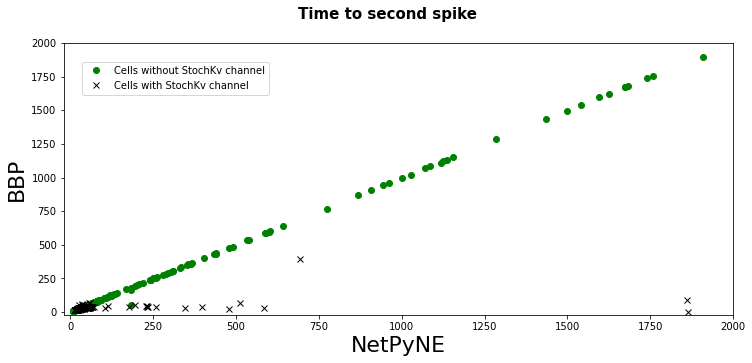

In [14]:
feature_BBP = []
feature_NetPyNE = []
feature_BBP_Stoch = []
feature_NetPyNE_Stoch = []

for cell in MEtypePop:
    for number in range(1,6):
        cellName = cell+'_'+str(number)
        feature_name = 'time_to_second_spike'
        step_number = 0
        if feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])]==0:
            step_number += 1
            if feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])]==0:
                step_number += 1
                if feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])]==0:
                    step_number += 1
                    if feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])]==0:
                        step_number += 1
        
        if step_number < 4:
#             print(cellName, feature_name, ampstim[step_number],'BBP', feature_efel[cellName]['BBP'][cellName][feature_name][str(ampstim[step_number])])
#             print(cellName, feature_name, ampstim[step_number], 'NetPyNE', feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])])
            if cell in StochKvcells:
                feature_BBP_Stoch.append(feature_efel[cellName]['BBP'][cellName][feature_name][str(ampstim[step_number])])
                feature_NetPyNE_Stoch.append(feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])])
            else:
                feature_BBP.append(feature_efel[cellName]['BBP'][cellName][feature_name][str(ampstim[step_number])])
                feature_NetPyNE.append(feature_efel[cellName]['NetPyNE'][cellName][feature_name][str(ampstim[step_number])])

# plot
fontsiz=22
figSize = (12,5)
fig = plt.figure(figsize=figSize)  # Open a new figure
fig.suptitle('Time to second spike', fontsize=15, fontweight='bold')
plt.subplot(1, 1, 1)
plt.ylabel('BBP', fontsize=fontsiz)
plt.plot(feature_NetPyNE, feature_BBP, 'go', label='Cells without StochKv channel') 
plt.plot(feature_NetPyNE_Stoch, feature_BBP_Stoch, 'kx', label='Cells with StochKv channel') 
plt.xlabel('NetPyNE', fontsize=fontsiz)
plt.xlim(-20, 2000)
plt.ylim(-20, 2000)
plt.grid(False)
plt.legend(loc='upper right', bbox_to_anchor=(0.315, 0.95))
# plt.ion()
plt.savefig(rootFolder + '/info/scripts_comparations/Figures-comparation/0.1_0.2_0.4_0.8_nA/comparation_%s.png' % feature_name, facecolor = 'white' , dpi=300)
                    